In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## load dataset

In [2]:
df_raw = pd.read_csv('Data.csv')
df_raw


,Failure Reason,Current Drawn
0,Bearing damage,5
1,Bearing damage,10
2,Bearing damage,204
3,Bearing damage,17
4,Bearing damage,6
5,Bearing damage,-41
6,Bearing damage,9
7,Bearing damage,370
8,Bearing damage,11
9,Bearing damage,12


In [3]:
df_raw.shape

(20, 2)

In [4]:
df_raw.describe()

,Current Drawn
count,20.000000
mean,56.900000
std,114.071031
min,-41.000000
25%,8.250000
50%,13.500000
75%,22.000000
max,370.000000


## Boxplot

In [5]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

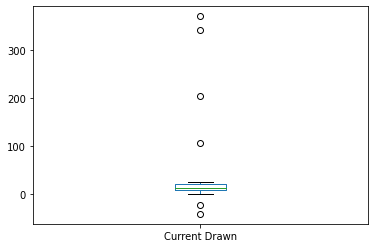

In [6]:
plot_boxplot(df_raw,'Current Drawn')

## Remove Outliers

In [7]:
# define a function called "outliers" which return a list of index of outliers
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [8]:
index_list = []
for current in ['Current Drawn']:
    index_list.extend(outliers(df_raw,current))

In [9]:
index_list

[2, 5, 7, 12, 15, 16]

In [10]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

## Cleaned Dataset


In [11]:
df_cleaned = remove(df_raw,index_list)

In [12]:
df_cleaned.shape

(14, 2)

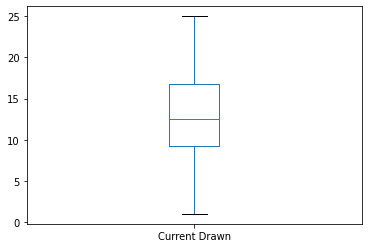

In [13]:
plot_boxplot(df_cleaned,'Current Drawn')

In [14]:
df_cleaned.to_csv('Test.cleaned.csv',index=False)
df_cleaned

,Failure Reason,Current Drawn
0,Bearing damage,5
1,Bearing damage,10
3,Bearing damage,17
4,Bearing damage,6
6,Bearing damage,9
8,Bearing damage,11
9,Bearing damage,12
10,Impellar crack,14
11,Impellar crack,16
13,Impellar crack,19


In [15]:
df_cleaned.shape

(14, 2)